In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("finalmarket.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Amount,Month,Category,Hour,City
0,176558,USB-C Charging Cable,2,865.0,2019-04-19 08:46:00,1730.0,4,Charger,8,Kochi
1,176559,Bose SoundSport Headphones,1,7238.0,2019-04-07 22:30:00,7238.0,4,Headphone,22,Chennai
2,176560,Pixel 4A,1,43434.0,2019-04-12 14:38:00,43434.0,4,Phone,14,Mumbai
3,176560,Wired Headphones,1,868.0,2019-04-12 14:38:00,868.0,4,Headphone,14,Mumbai
4,176561,Wired Headphones,1,868.0,2019-04-30 09:27:00,868.0,4,Headphone,9,Mumbai


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Amount            185950 non-null  float64
 6   Month             185950 non-null  int64  
 7   Category          185950 non-null  object 
 8   Hour              185950 non-null  int64  
 9   City              185950 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [5]:
month_results = df.groupby("Month").sum()["Amount"]
month_results

Month
1     131911323.0
2     159402062.0
3     203203027.0
4     245447126.0
5     228213951.0
6     186604505.0
7     191669704.0
8     162474699.0
9     151840144.0
10    270497713.0
11    231615827.0
12    333962263.0
Name: Amount, dtype: float64

In [6]:
month_results = month_results/10000000

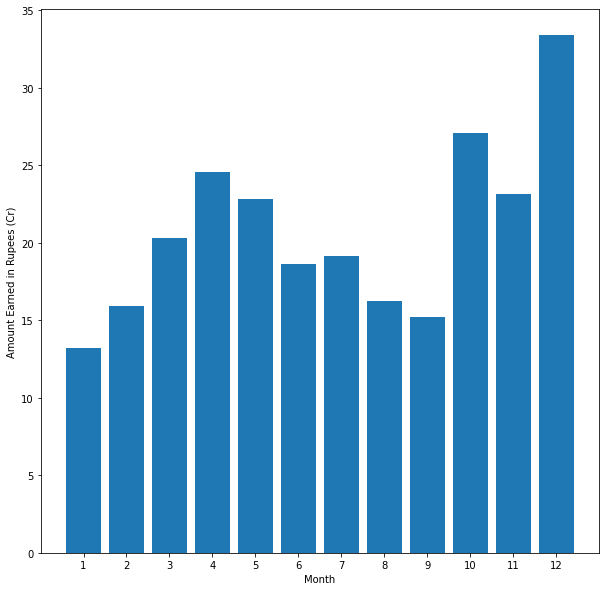

In [12]:
months = range(1, 13)
plt.figure(figsize=(10, 10))
plt.bar(months, month_results)
plt.xticks(months)

plt.xlabel("Month")
plt.ylabel("Amount Earned in Rupees (Cr)")
plt.show()

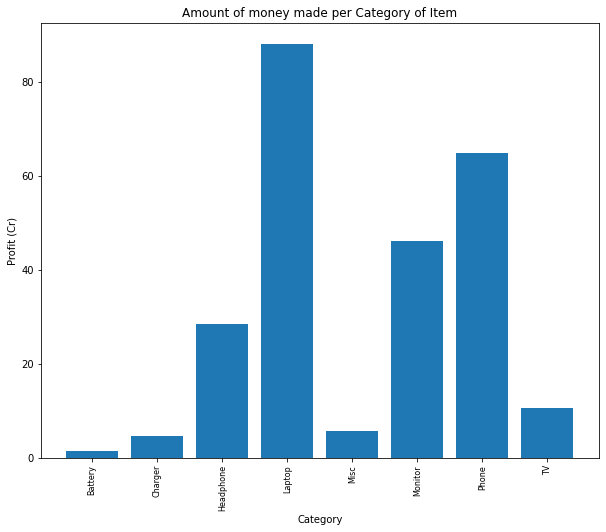

In [27]:
cats = [cat for cat , df in df.groupby('Category')]
plt.figure(figsize = (10, 8))
plt.bar(cats, df.groupby('Category').sum()["Amount"]/10000000)
plt.xticks(cats, rotation = "vertical", size = 8)
plt.xlabel("Category")
plt.ylabel("Profit (Cr)")
plt.title("Amount of money made per Category of Item")
plt.show()

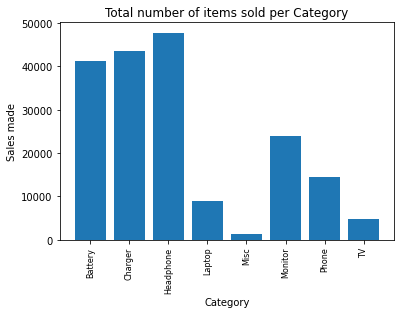

In [20]:
plt.bar(cats, df.groupby('Category').count()["Amount"])

plt.xticks(cats, rotation = "vertical", size = 8)
plt.xlabel("Category")
plt.ylabel("Sales made")
plt.title("Total number of items sold per Category")
plt.show()

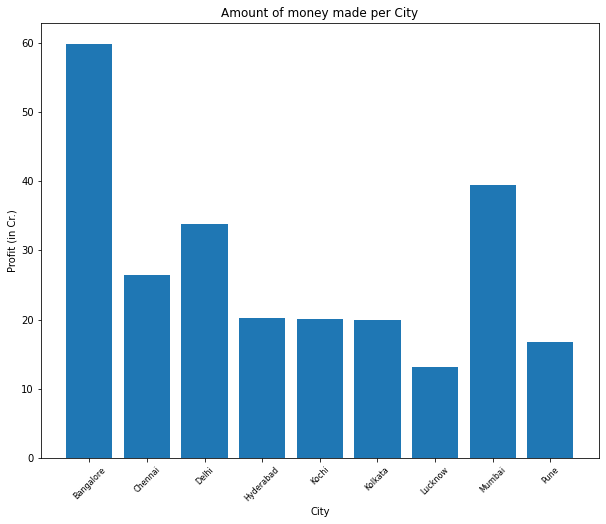

In [26]:
cities = [city for city , df in df.groupby('City')]
plt.figure(figsize = (10, 8))
plt.bar(cities, df.groupby('City').sum()["Amount"]/10000000)
plt.xticks(cities, rotation = "45", size = 8)
plt.xlabel("City")
plt.ylabel("Profit (in Cr.)")
plt.title("Amount of money made per City")
plt.show()

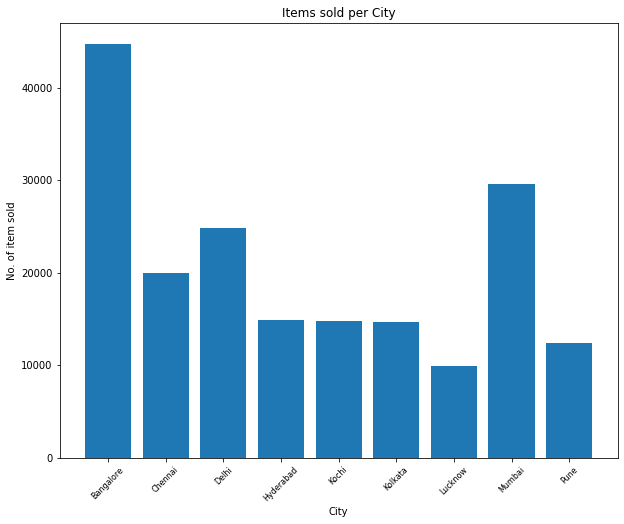

In [28]:
cities = [city for city , df in df.groupby('City')]
plt.figure(figsize = (10, 8))
plt.bar(cities, df.groupby('City').count()["Amount"])
plt.xticks(cities, rotation = "45", size = 8)
plt.xlabel("City")
plt.ylabel("No. of item sold")
plt.title("Items sold per City")
plt.show()

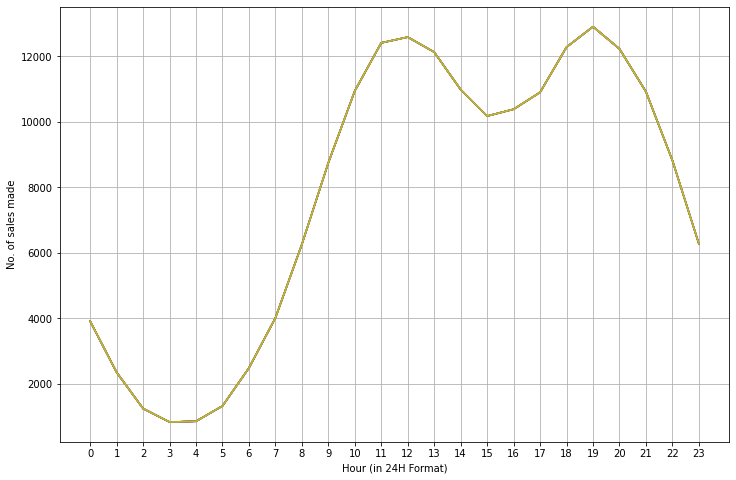

In [30]:
hours = [hour for hour, df in df.groupby("Hour")]
plt.figure(figsize = (12, 8))
plt.plot(hours, df.groupby(["Hour"]).count())
plt.grid()
plt.xticks(hours)
plt.xlabel("Hour (in 24H Format)")
plt.ylabel("No. of sales made")
plt.show()

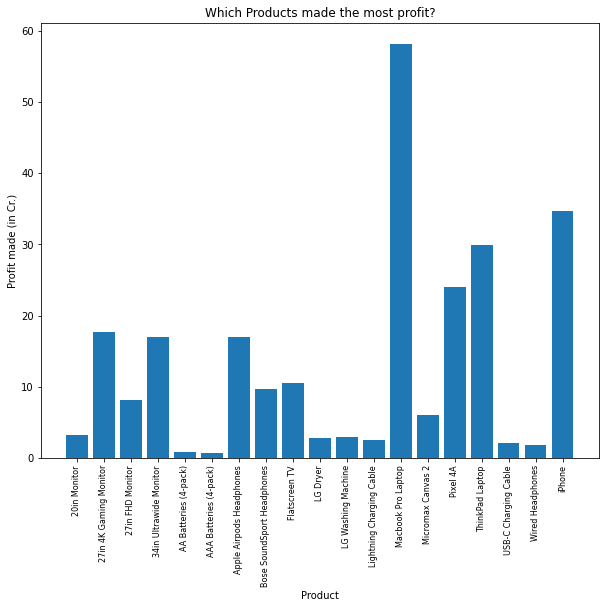

In [34]:
prods = [prod for prod , df in df.groupby('Product')]
plt.figure(figsize = (10, 8))
plt.bar(prods, df.groupby('Product').sum()["Amount"]/10000000)
plt.xticks(prods, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Profit made (in Cr.)")
plt.title("Which Products made the most profit?")
plt.show()

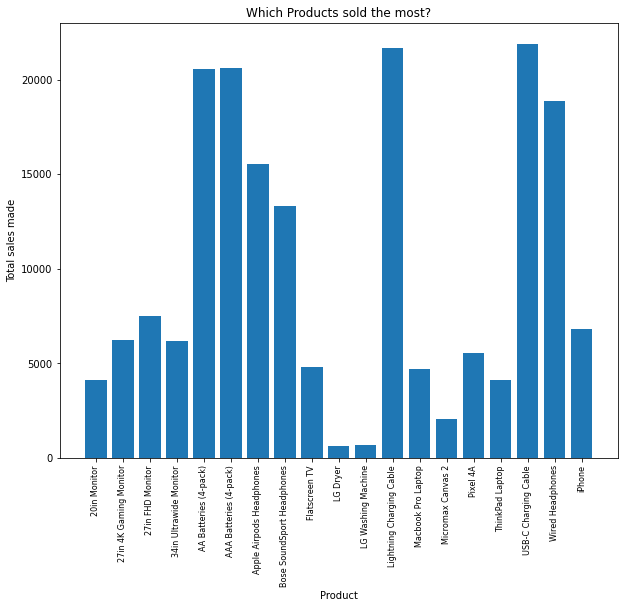

In [35]:
prods = [prod for prod , df in df.groupby('Product')]
plt.figure(figsize = (10, 8))
plt.bar(prods, df.groupby('Product').count()["Amount"])
plt.xticks(prods, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Total sales made")
plt.title("Which Products sold the most?")
plt.show()

In [36]:
df_grp = df[df["Order ID"].duplicated(keep = False)]

df_grp["Grouped"] = df_grp.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))

df_grp = df_grp[["Order ID", "Grouped"]].drop_duplicates()

df_grp = df_grp.reset_index(drop = True)
df_grp.head()

<ipython-input-36-fe762e86c992>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp["Grouped"] = df_grp.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,176560,"Pixel 4A,Wired Headphones"
1,176574,"Pixel 4A,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Pixel 4A"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"
